<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/CH09_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

562~579

# CHAPTER 09 추천 시스템

**01 추천 시스템의 개요와 배경**

아마존, 애플 뮤직, 유튜브 등등 추천 시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠 제공


**온라인 스토어의 필수요소, 추천 시스템**

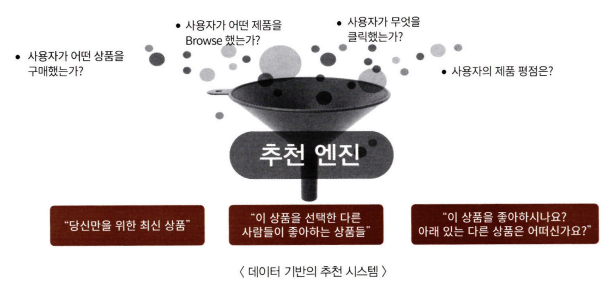

**추천 시스템의 유형**

1) 콘텐츠 기반 필터링

2) 협업 필터링
  1. 최근접 이웃 협업 필터링
  2. 잠재 요인 협업 필터링

초창기에는 콘텐츠 기반 필터링이나 최근접 이웃 협업 필터링 주로 사용.

**02 콘텐츠 기반 필터링 추천 시스템**

사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식.


ex) 영화 콘텐츠

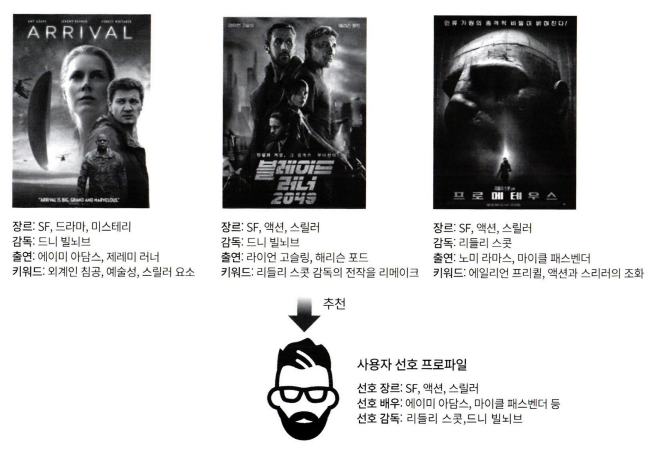

**03 최근접 이웃 협업 필터링**

<협업 필터링>

: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것

- 주요 목표
: 사용자 아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가 하는 것.

협업 필터링 기반 추천 시스템은 최근접 이웃, 잠재 요인 방식으로 나뉘며 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행.

협업 필터링 알고리즘에 사용되는 사용자-아이템 평점 행렬에서 행은 개발 사용자, 열은 개별 아이템으로 구성되며, 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태.

최근접 이웃 협업 필터링의 2가지 종류

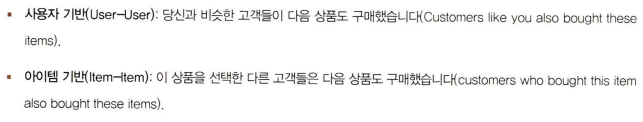


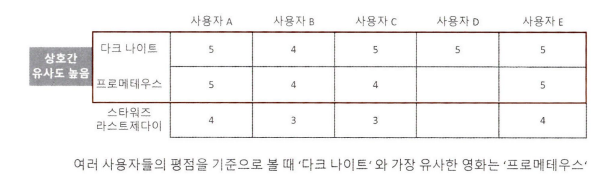

일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음. 비슷한 영화를 좋아한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문.



**04 잠재 요인 협업 필터링**

**잠재 요인 협업 필터링의 이해**

사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법.
'잠재 요인'을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘의 골자.

- 행렬 분해 : 대규모 다차원 행렬을 SVD 와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출하는 것을 의미

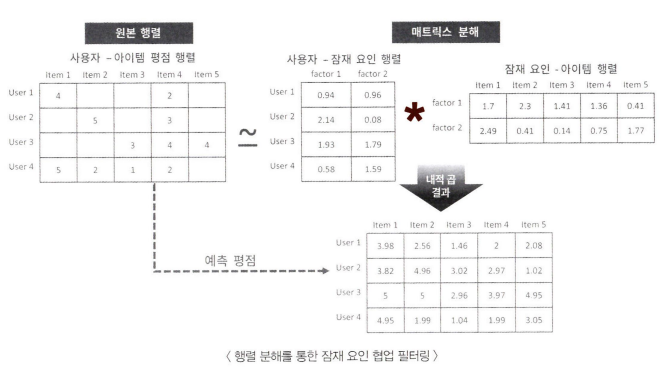

행렬 분해에 의해 추출되는 잠재 요인이 정확히 어떤 것인지는 알 수 없지만 선호도 가정은 가능.


**행렬 분해의 이해**

행렬 분해는 다차원 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD, NMF 등이 있다.

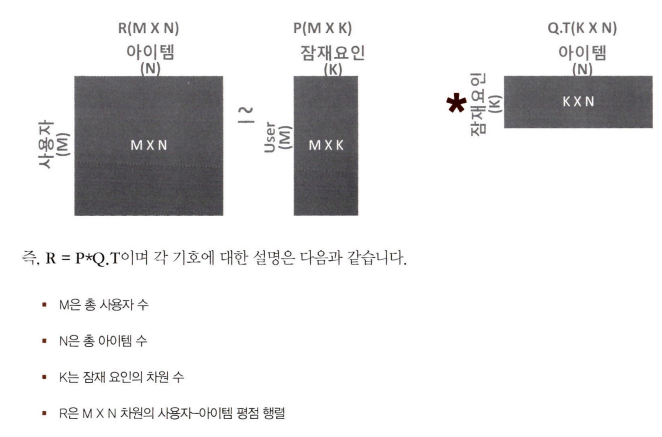

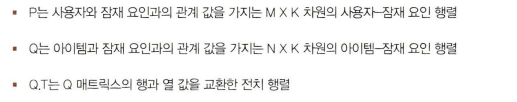

행렬 분해는 주로 SVD 방식을 이용. 하지만 SVD 는 NaN 값이 없는 행렬에만 적용 가능.

만약 NaN 값이 있다면 확률적 경사 하강법 이나 ALS 방식을 활용해 SVD 수행.

**확률적 경사 하강법을 이용한 행렬 분해**

P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해 내는 것.

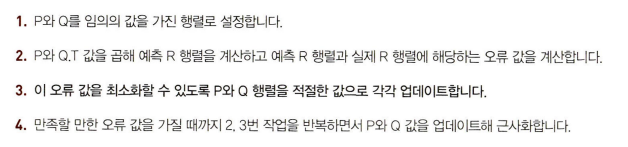

- 실제 값과 예측값의 오류 최소화와 1,2 규제를 고려한 비용 함수식

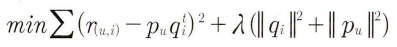

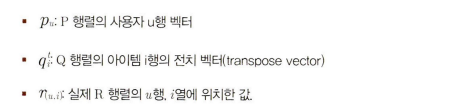

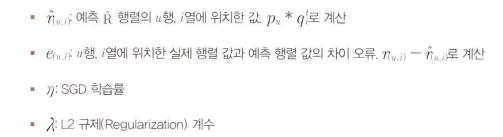

****
SGD 이용해 행렬 분해 수행하는 예제

: 분해하려는 원본 행렬 R을 P와 Q 로 분해한 뒤에 다시 P와 Q.T 의 내적으로 예측 행렬을 만드는 예제.

In [12]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users,K))
Q = np.random.normal(scale=1./K, size=(num_items,K))

In [13]:
# get_rmse() : 실제 R 행렬과 예측 행렬의 오차를 구해줌

from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

- steps : SGD 반복해서 업데이트할 횟수
- learning_rate : SGD의 학습률
- r_lambda : 1.2 Regularization 계수


In [14]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0 ]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
    Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])
  rmse = get_rmse(R, P, Q, non_zeros)
  if (step % 50) == 0:
    print('### iteration step:', step, 'rmse:', rmse)

### iteration step: 0 rmse: 3.2388050277987723
### iteration step: 50 rmse: 0.4876723101369648
### iteration step: 100 rmse: 0.1564340384819247
### iteration step: 150 rmse: 0.07455141311978046
### iteration step: 200 rmse: 0.04325226798579314
### iteration step: 250 rmse: 0.029248328780878973
### iteration step: 300 rmse: 0.022621116143829466
### iteration step: 350 rmse: 0.019493636196525135
### iteration step: 400 rmse: 0.018022719092132704
### iteration step: 450 rmse: 0.01731968595344266
### iteration step: 500 rmse: 0.016973657887570753
### iteration step: 550 rmse: 0.016796804595895633
### iteration step: 600 rmse: 0.01670132290188466
### iteration step: 650 rmse: 0.01664473691247669
### iteration step: 700 rmse: 0.016605910068210026
### iteration step: 750 rmse: 0.016574200475705
### iteration step: 800 rmse: 0.01654431582921597
### iteration step: 850 rmse: 0.01651375177473524
### iteration step: 900 rmse: 0.01648146573819501
### iteration step: 950 rmse: 0.016447171683479155


In [15]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
